# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_coincheck_trades_df()
ex2_trades = ta.get_liquid_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(312, 312)

## トレード結果

In [9]:
ta.display()

トレード情報
+---------------------+---------------------+
|          レコード数 |               72520 |
+---------------------+---------------------+
|            取引回数 |                 312 |
+---------------------+---------------------+
|            開始日時 | 2020-03-20 02:10:49 |
+---------------------+---------------------+
|            終了日時 | 2020-03-21 00:10:19 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 21:59:30 |
+---------------------+---------------------+
|       取引単位[BTC] |              0.0065 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                2000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                1000 |
+---------------------+---------------------+

トレード結果
+-------------+-------+
| 開始[JPY]   | 11002 |
+-------------+-------+
| 終了[JPY]   |  6094 |
+-------------+-------+
| 利益[JPY]   | -4908 |
+-------------+-------+
| 開始[BTC]   | 0.022 |
+-------------+-------+
| 終了[BTC]   | 0.028 |
+----------

## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2020-03-20 22:06:28,sell,4751.812,buy,4746.415,5.397
2020-03-20 22:28:45,buy,4697.995,sell,4700.969,2.974
2020-03-20 22:28:46,sell,4708.658,buy,4702.360,6.298
2020-03-20 22:38:31,buy,4731.999,sell,4731.019,-0.980
2020-03-20 22:38:37,sell,4739.793,buy,4731.259,8.534
2020-03-20 22:48:41,buy,4710.998,sell,4702.236,-8.762
2020-03-20 22:54:38,sell,4731.545,buy,4724.532,7.013
2020-03-20 22:58:51,buy,4737.998,sell,4735.646,-2.352
2020-03-20 22:59:08,sell,4734.275,buy,4730.733,3.542


In [12]:
round(sum(profit_df.profit), 3)

646.438

## トレードグラフ

In [13]:
ex1_ticks = ta.get_coincheck_ticks_df()
ex2_ticks = ta.get_liquid_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(72520, 72520)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('exchange1 bid/exchange2 ask')
ax2.set_title('exchange2 bid/exchange1 ask')

Text(0.5, 1, 'exchange2 bid/exchange1 ask')

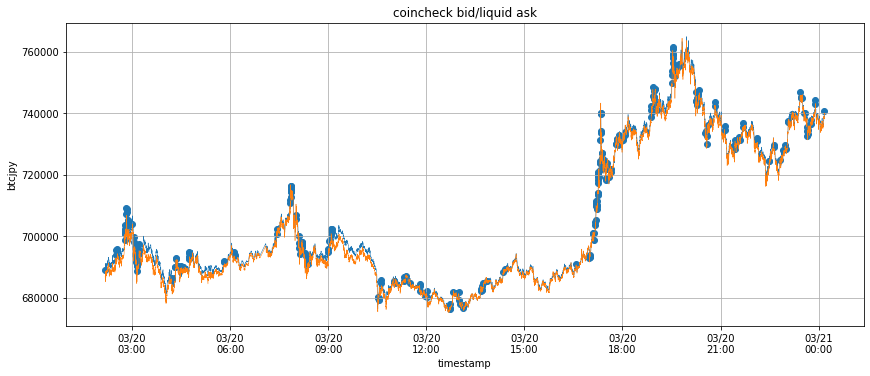

In [16]:
fig1

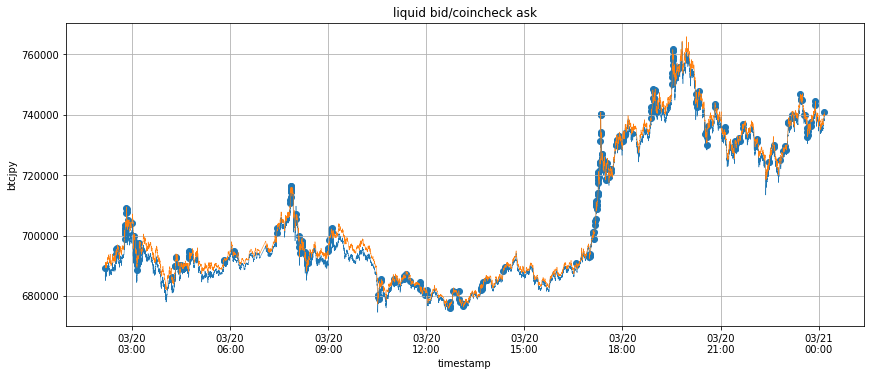

In [17]:
fig2